In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values


In [8]:
print(X), print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


(None, None)

In [9]:
print(X.shape), print(y.shape)

(10000, 10)
(10000,)


(None, None)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder(categorical_features = [1])
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]

In [11]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred_log = logreg.predict(X_test)

In [74]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[1542,   53],
       [ 333,   72]])

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))


Accuracy: 0.807


In [76]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'regressor' is not defined

Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
predictions = clf.predict(X_test)

In [68]:
cnf_matrix_dt = confusion_matrix(y_test, predictions)
cnf_matrix_dt

array([[1358,  237],
       [ 193,  212]])

In [69]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, predictions)

0.785

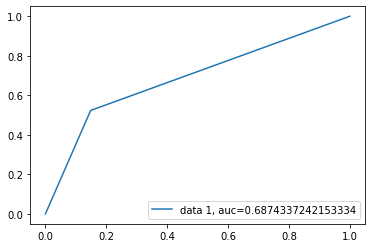

In [70]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_rf = rf.predict(X_test)

In [63]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cnf_matrix_rf

array([[1525,   70],
       [ 202,  203]])

In [64]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred_rf)

0.864

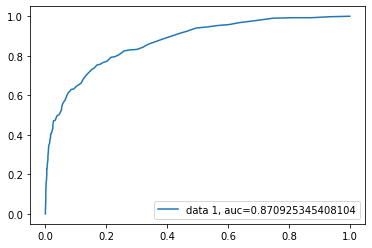

In [65]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred_gnb = gnb.predict(X_test)

In [57]:
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[1548,   47],
       [ 298,  107]])

In [58]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred_gnb)* 100)

accuracy: 82.75


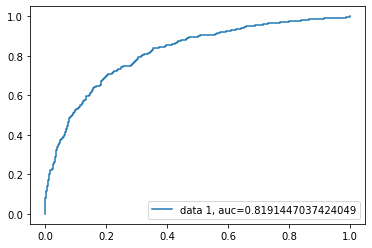

In [59]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Aritificial Neural Network

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
classifier = Sequential()

In [39]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [40]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [41]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [42]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4935 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4351 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4303 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4261 - accuracy: 0.8019
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4228 - accuracy: 0.8194
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4209 - accuracy: 0.8254
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4190 - accuracy: 0.8299
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4174 - accuracy: 0.8304
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4163 - accuracy: 0.8316
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4153 - accura

800/800 [==============================] - 2s 2ms/step - loss: 0.3992 - accuracy: 0.8356
Epoch 82/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8328
Epoch 83/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3993 - accuracy: 0.8339
Epoch 84/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8353
Epoch 85/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8359
Epoch 86/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8355
Epoch 87/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8341
Epoch 88/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8350
Epoch 89/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8340
Epoch 90/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3996 - accuracy: 

In [44]:
y_pred_ann = classifier.predict(X_test)
y_pred = (y_pred_ann > 0.5)

In [45]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1543   52]
 [ 262  143]]


In [52]:
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(y_test, y_pred)* 100)

accuracy: 84.3
